# Práctica No. 1.  Red simple con un generador de paquetes y un receptor

*Autor: Jhon Jairo Padilla Aguilar, PhD.*

## Objetivo:

Comprender cómo se realiza la generación de paquetes y el monitoreo de los paquetes en la salida.

## Topología de la red:

La red a construir es muy sencilla: se conectan un generador a un solo receptor. 

## Descripción del código:

Inicialmente, se importan las funciones expovariate (exponencial) de la librería random, luego la librería simpy, los elementos Packet Generator y PacketSink del archivo SimComponents y finalmente la librería matplotlib para las gráficas.  Esto se observa en el siguiente código en Python:

In [1]:
from random import expovariate
import simpy
from SimComponents import PacketGenerator, PacketSink
import matplotlib.pyplot as plt

A se definen dos funciones, la primera (constArrival), devuelve un valor exponencial con una media de 2.0 y que representa la tasa media de llegadas para el generador.   La segunda (distSize), devuelve un valor con una distribución exponencial con media 0.01.  Esto se observa en el siguiente código en Python:

In [2]:
def constArrival():  # distribución de llegadas para el generador de paquetes
    return expovariate(2.0)


def distSize():  # distribución del tamaño de los paquetes
    return expovariate(0.01)

A continuación se crea el ambiente de simulación en Simpy mediante la siguiente línea de código:

In [3]:
env = simpy.Environment()  # Crea el ambiente de simulación Simpy

Luego, se crean los 3 elementos que componen la red: ps, que es un receptor de paquetes, pg, que es un generador de paquetes cuyo nombre es EE283, y pg2 que es otro generador de paquetes cuyo nombre es SJSU.  Para ps se habilita el seguimiento o debugging para una salida simple.  Para el elemento pg se generan los paquetes con una tasa de llegadas ConstArrival y un tamaño de paquete distSize.  Para el elemento pg2 se usa una tasa de llegadas ConstArrival2 y una distribución de tamaño de paquete del mismo tipo que para pg.  Estos parámetros fueron descritos previamente.

In [4]:
# Crear el generador de paquetes y el Receptor
ps = PacketSink(env, debug=True, rec_arrivals=True)  # Creación del receptor. Usa debug=True para imprimir llegadas
pg = PacketGenerator(env, "EE283", constArrival, distSize) #Creación del generador


A continuación se conectan los elementos que componen la red así: la salida del generador pg con el receptor ps.  Finalmente se da la orden env.run(until==20) para indicar que se debe ejecutar la simulación hasta cumplir 20 unidades de tiempo

In [5]:
# Conectar el generador de paquetes con el receptor
pg.out = ps

env.run(until=20)

id: 1, src: EE283, time: 0.29244566069792327, size: 4.450564578389346
id: 2, src: EE283, time: 0.5530077119154428, size: 40.727101160385395
id: 3, src: EE283, time: 1.148247766954877, size: 253.044386381298
id: 4, src: EE283, time: 1.1680127626645764, size: 33.71577588837138
id: 5, src: EE283, time: 1.3214959272214033, size: 95.30884595997942
id: 6, src: EE283, time: 1.5999047956138746, size: 88.72933740227057
id: 7, src: EE283, time: 1.7231257114389522, size: 22.25711110865629
id: 8, src: EE283, time: 3.9274882562086058, size: 289.29124553617686
id: 9, src: EE283, time: 4.65650391436357, size: 81.09881955648922
id: 10, src: EE283, time: 4.753135142991935, size: 442.34126993667587
id: 11, src: EE283, time: 5.760615578319653, size: 4.197010936405443
id: 12, src: EE283, time: 8.03175710440661, size: 132.77382973902172
id: 13, src: EE283, time: 8.480842041859535, size: 28.328207089279182
id: 14, src: EE283, time: 8.645430933473415, size: 108.5908782699622
id: 15, src: EE283, time: 9.21365

La salida del programa muestra la identificación del paquete (id), la fuente o generador que lo produjo (src), el tiempo en que fue emitido (time) y el tamaño (size).

Ahora se graficará el histograma de los paquetes recibidos, para lo que se usa la función hist para los histogramas y como datos de entrada para el gráfico se toman las llegadas que han sido registradas en ps.arrivals.  El numero de clases se da con bins=15.  El gráfico se obtiene con el siguiente código:

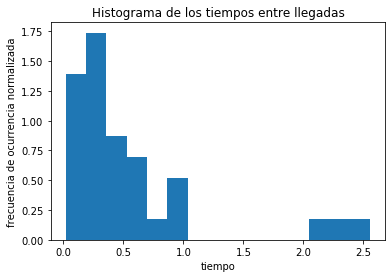

In [6]:
fig, axis = plt.subplots()
axis.hist(ps.arrivals, bins=15, density=True)
axis.set_title("Histograma de los tiempos entre llegadas")
axis.set_xlabel("tiempo")
axis.set_ylabel("frecuencia de ocurrencia normalizada")
# fig.savefig("ArrivalHistogram.png")
plt.show()

Se observa en el gráfico que el histograma de los tiempos de llegada tiene una forma aproximada de una distribución exponencial.

## Pruebas con diferentes tipos de distribuciones de tráfico

Ahora, tome en cuenta las definiciones de las distribuciones de la librería random:

**lognormvariate(mu, sigma)**
Logaritmo de la distribución normal. Si se usa un logaritmo natural de esta distribución, se obtendrá una distribución normal con media mu y desviación estándar sigma. mu puede tener cualquier valor, y sigma debe ser mayor que cero.

**normalvariate(mu, sigma)**
Distribución normal. mu es la media y sigma es la desviación estándar.

**paretovariate(alpha)**
Distribución de Pareto. alpha es el parámetro de forma.

**weibullvariate(alpha, beta)**
Distribución de Weibull. alpha es el parámetro de escala y beta es el parámetro de forma.

### Tarea:

Debe importar las respectivas funciones desde la librería random al inicio del código, y luego debe usar la función constArrival() para que en lugar de retornar números aleatorios con la distribución exponencial, lo haga con una de las 4 distribuciones mencionadas.  Repita el procedimiento para las 4 distribuciones listadas y genere el histograma para cada caso. Utilice medias similares a las del ejemplo anterior. Escriba un reporte con los pasos seguidos y los resultados obtenidos para cada distribución de probabilidad.